In [26]:
# K-means
import yfinance as yf
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# Descargar los datos del índice S&P 500
df = yf.download('^GSPC', start='2015-01-01', end='2023-01-01')

[*********************100%***********************]  1 of 1 completed


In [28]:
# Calcular caractestisticas adicionales
df['Price Change'] = df['Close'].pct_change() * 100 #Cambio porcentual diario del precio
df['Volatility'] = df['High'] - df['Low']  #Rango de precios como medida de volatilidad
df['Volume'] = df['Volume'] # Volumen diario

In [29]:
# Limpiar datos eliminando NaNs
df.dropna(inplace=True)

In [30]:
# Seleccionar las caracteristicas para el clustering
X = df[['Price Change', 'Volatility', 'Volume']]

In [31]:
# Aplicar K-means con 4 clusteres
kmeans = KMeans(n_clusters=4, random_state=42)
df['Market Regime'] = kmeans.fit_predict(X)

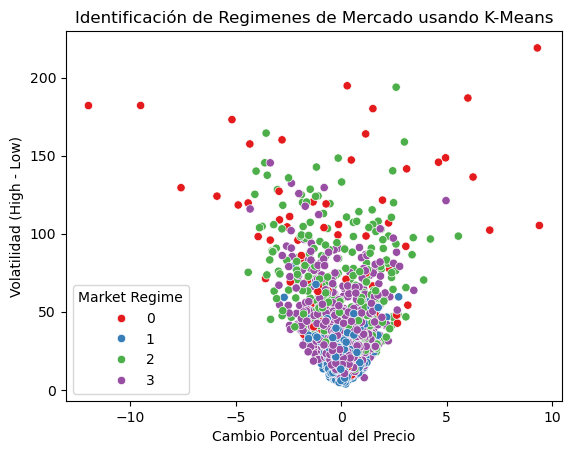

In [36]:
# Visualizar los clústeres indentificados por el modelo
sns.scatterplot(x='Price Change', y='Volatility', 
                hue='Market Regime', data=df, palette='Set1')
plt.title('Identificación de Regimenes de Mercado usando K-Means')
plt.xlabel('Cambio Porcentual del Precio')
plt.ylabel('Volatilidad (High - Low)')
plt.show()

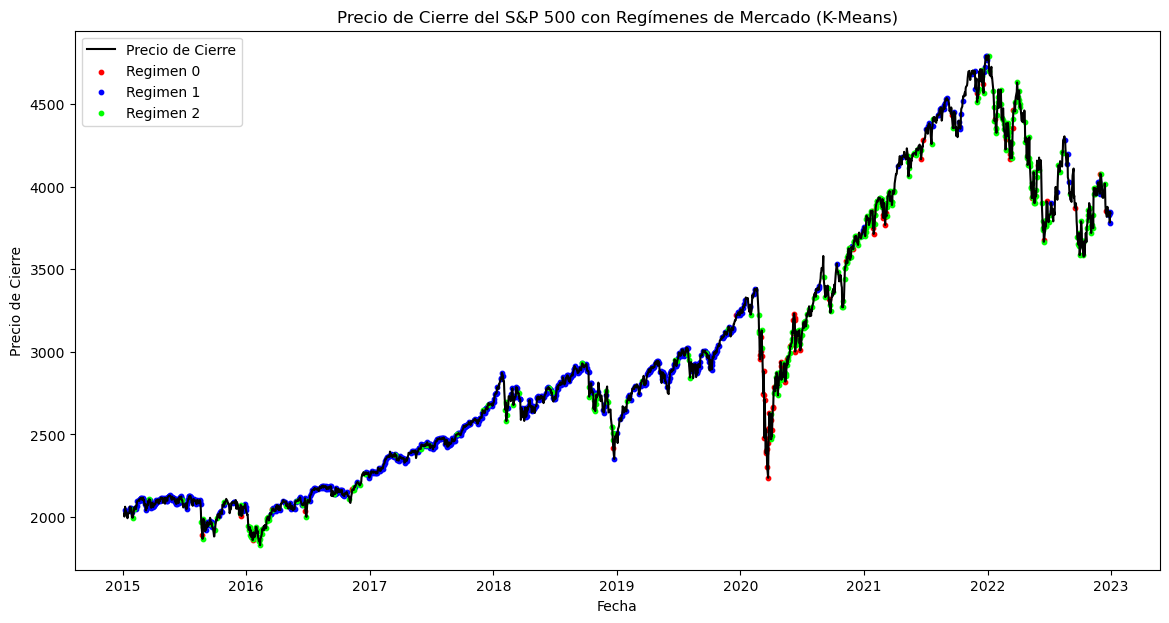

In [41]:
# Graficar la linea de cierre y sus regímenes de mercado
plt.figure(figsize=(14,7))
# Colores para cada clúster
colors=['#ff0000', '#0000ff', '#00ff00']
plt.plot(df.index, df['Close'], color='black', label='Precio de Cierre')

# Superponer puntos de color segùn el regimen

for regime in range(3):
    plt.scatter(df.index[df['Market Regime'] == regime],
                df['Close'][df['Market Regime'] == regime],
                color=colors[regime], label=f'Regimen {regime}', s=10)

plt.title('Precio de Cierre del S&P 500 con Regímenes de Mercado (K-Means)')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.legend(loc='best')
plt.show()